<a href="https://colab.research.google.com/github/diegopescoalcalde/portfolio/blob/master/How_the_increase_of_killings_by_Police_officers_impacts_violence_rates_in_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **How the increase of killings by Police officers impacts violence rates in Rio de Janeiro**
---
*by [Diego Pesco Alcalde](https://www.linkedin.com/in/diegopesco/)*

<br>

**The death of George Floyd in the United States made a strong mark in the fight against racism and human rights.** People around the world went to the streets to demand the end of racism and appropriate police conducts. With that in mind I decided to find more data on how Brazil relates to these topics and found this [publication](https://www.bbc.com/news/world-latin-america-51220364) from BBC, showing **a record in police killings in the state of Rio de Janeiro in 2019.** 
  
Rio de Janeiro is famous for being one of the most beautiful places of the world. Unfortunately it is also known as a really violent city, with high criminality rates and public safety issues.

<br>

![Rio de Janeiro](https://revistacapitaleconomico.com.br/wp-content/uploads/2019/11/melhor-lugar-para-se-morar-no-rio-de-janeiro.jpg)

<br>

In BBC's article the statements of the public representatives mention that the "policy of confrontation" that was implemented by the safety agencies helped to reduce homicide rates. BBC doesn't seem to agree in the article but they did not proceed by bringing data to support any of the statements.

So I decided to look by myself to the whole violence numbers in the state of Rio de Janeiro and **see if the increase in police killings meant an actual reduction of criminality rate.**


## Data Collection


The dataset for the study is an official report which is publicly available on Public Safety Institute from Rio de Janeiro, that has the numbers of different crimes by month, from 1991 until 2020. I downloaded it on June 10th, 2020.

### Importing Libraries and Dataset



In [223]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/diegopescoalcalde/portfolio/master/violencia_estado_rj_mensal.csv", sep=';', engine='python')
#df = pd.read_csv("https://raw.githubusercontent.com/diegopescoalcalde/portfolio/master/violencia_rio.csv")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Pre-processing

Pre-processing data is a critical part to guarantee a fair and proper analysis. On this phase the integrity of the dataset is verified and anomalies can be identified and treated. A dataset with problems can generate errors in an automatic code or mislead conclusions when analyzed. **If you are interested in the practical results you can jump to the next section.**

To start we can check the first entries of the dataset.


In [153]:
df.tail()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
347,2019,12,330,8,5,124,467,410,5413,421,189,2398,368,88,3118,609,5076,1029,7,1,1830,11,116,17,1773,14043,1230,1564,584,1420,224,7199,12221,2,107,7,3645,1723,831,817,106,2055,2593,402,1132,222,4676,380,23,2,1,0,343,7935,3118,609,59808,3
348,2020,1,349,4,7,152,512,452,5374,398,134,1948,414,74,3246,577,6205,1191,1,5,2191,6,97,29,1845,15881,1365,2117,582,1740,278,8562,14644,0,98,9,3950,1720,734,877,140,2128,2856,482,1335,265,4942,400,36,1,2,0,360,9587,3246,577,65718,2
349,2020,2,323,2,10,164,499,422,5410,420,145,1899,382,61,2925,418,5696,1309,2,7,2068,4,79,12,1552,14515,1182,2133,568,2267,231,7328,13709,0,103,10,3547,1738,776,877,111,1788,2883,431,1190,243,4643,378,39,2,1,0,335,9073,2925,418,62850,2
350,2020,3,372,2,9,113,496,363,4069,367,126,1253,308,71,2450,366,4406,993,0,7,1542,5,92,18,1715,11973,1113,1210,393,1138,180,6752,10786,0,99,16,3086,1469,558,814,128,1526,2543,385,914,180,3243,272,16,0,1,0,383,6941,2450,366,49817,2
351,2020,4,311,5,5,177,498,324,2724,241,127,590,169,56,1847,337,2536,498,2,4,987,1,53,13,1406,7909,922,283,105,304,106,4001,5721,0,95,9,2594,1436,428,918,123,1114,2452,410,544,2,2216,178,26,3,1,0,321,4021,1847,337,32814,2


The Dataset provides the number of events of different crime types per month and per year. 

In order to allow statistical and graphical methods to work properly in the later stages of the analysis it is also important to have the data in a proper format. If the data format is not matching the needs of the study some transformations might be needed.

Also, the dimension of the dataset is an important parameter to choose among different processing options. Different methods might change drastically the computational costs and results. So this information also needs to be investigated in the beginning.

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ano                         352 non-null    int64 
 1   mes                         352 non-null    int64 
 2   hom_doloso                  352 non-null    int64 
 3   lesao_corp_morte            352 non-null    object
 4   latrocinio                  352 non-null    int64 
 5   hom_por_interv_policial     352 non-null    object
 6   letalidade_violenta         352 non-null    int64 
 7   tentat_hom                  352 non-null    int64 
 8   lesao_corp_dolosa           352 non-null    int64 
 9   estupro                     352 non-null    object
 10  hom_culposo                 352 non-null    object
 11  lesao_corp_culposa          352 non-null    object
 12  roubo_comercio              352 non-null    int64 
 13  roubo_residencia            352 non-null    int64 

Changing all variables to numeric types will allow mathematical operations.

In [197]:

for i in df.columns:
  df[i] = pd.to_numeric(df[i], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ano                         352 non-null    int64  
 1   mes                         352 non-null    int64  
 2   hom_doloso                  352 non-null    int64  
 3   lesao_corp_morte            256 non-null    float64
 4   latrocinio                  352 non-null    int64  
 5   hom_por_interv_policial     268 non-null    float64
 6   letalidade_violenta         352 non-null    int64  
 7   tentat_hom                  352 non-null    int64  
 8   lesao_corp_dolosa           352 non-null    int64  
 9   estupro                     208 non-null    float64
 10  hom_culposo                 268 non-null    float64
 11  lesao_corp_culposa          256 non-null    float64
 12  roubo_comercio              352 non-null    int64  
 13  roubo_residencia            352 non

From the summary above we observe that we have to deal with missing values before moving on. Let's check the percentage of missing values for each variable.

In [198]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.784091
furto_bicicleta               0.784091
cmba                          0.511364
cmp                           0.511364
posse_drogas                  0.511364
trafico_drogas                0.511364
apreensao_drogas_sem_autor    0.511364
apf                           0.511364
aaapai                        0.511364
sequestro_relampago           0.409091
estelionato                   0.409091
roubo_conducao_saque          0.409091
furto_coletivo                0.409091
roubo_apos_saque              0.409091
pol_militares_mortos_serv     0.409091
pol_civis_mortos_serv         0.409091
furto_celular                 0.409091
roubo_cx_eletronico           0.409091
estupro                       0.409091
extorsao                      0.409091
pessoas_desaparecidas         0.375000
encontro_ossada               0.375000
roubo_celular                 0.306818
registro_ocorrencias          0.272727
lesao_corp_culposa            0.272727
sequestro                

The quantity of missing values is too high to remove them from the dataset. It is important to get a sense of the data distribution behaviour for these variables before considering alternatives to deal with this issue.

<function matplotlib.pyplot.tight_layout>

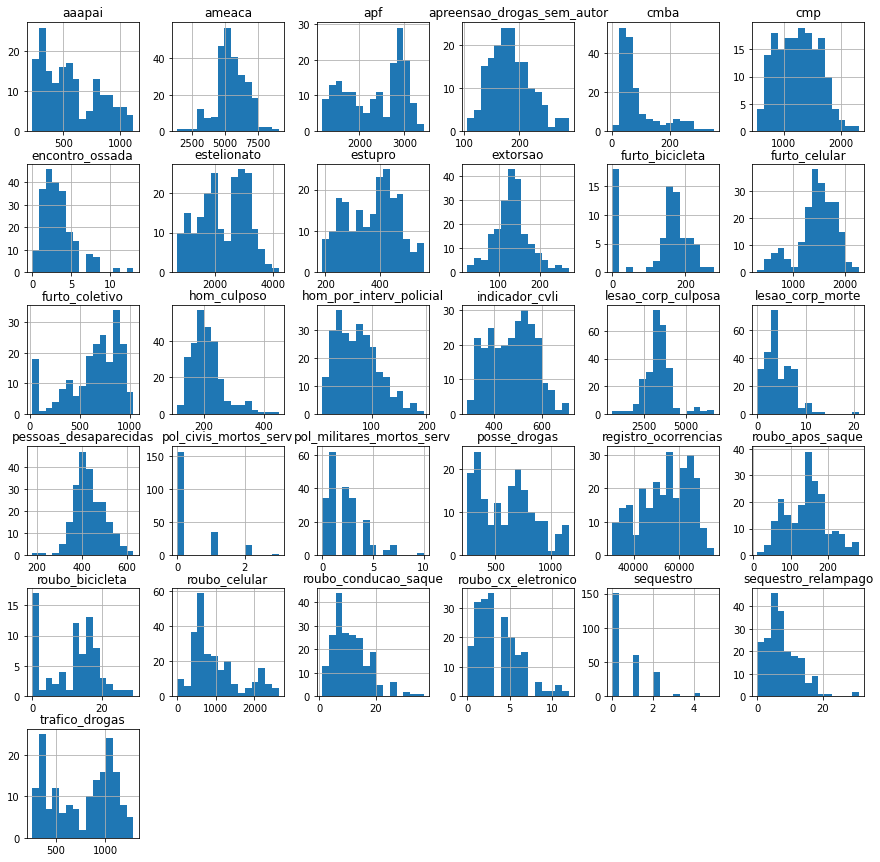

In [199]:
df_missing = df.loc[:, (df.isnull().sum() > 0)]
df_missing.hist(bins=15, figsize=(15, 15));
plt.tight_layout

The distributions show many different patterns. For symmetrically distributed data we can use the mean as replacement for the missing values. For highly skewed data it is more appropriate to use the median. Distributions with tendencies of systematic effects have to be more deeply analyzed in case a big quantity of replacements are needed. 

Since not all variables are matter of interest in the study, let's deal only with the most relevant ones, and remove the rest.

In [208]:
df_clean = df.copy()
df_clean.estupro.fillna(df.estupro.mean(), inplace=True)
df_clean.estupro.isnull().sum()

df_clean.sequestro_relampago.fillna(df.sequestro_relampago.mean(), inplace=True)
df_clean.sequestro.fillna(df.sequestro.median(), inplace=True)
df_clean.hom_culposo.fillna(df.hom_culposo.median(), inplace=True)
df_clean.hom_por_interv_policial.fillna(df.hom_por_interv_policial.median(), inplace=True)
df_clean.dropna(axis=1, inplace=True)
df_clean.shape
df_clean.isnull().sum()

ano                        0
mes                        0
hom_doloso                 0
latrocinio                 0
hom_por_interv_policial    0
letalidade_violenta        0
tentat_hom                 0
lesao_corp_dolosa          0
estupro                    0
hom_culposo                0
roubo_comercio             0
roubo_residencia           0
roubo_veiculo              0
roubo_carga                0
roubo_transeunte           0
roubo_em_coletivo          0
roubo_banco                0
outros_roubos              0
total_roubos               0
furto_veiculos             0
furto_transeunte           0
outros_furtos              0
total_furtos               0
sequestro                  0
sequestro_relampago        0
apreensao_drogas           0
recuperacao_veiculos       0
encontro_cadaver           0
indicador_roubo_rua        0
indicador_roubo_veic       0
indicador_roubo_carga      0
fase                       0
dtype: int64

In [209]:
df_clean = df_clean.astype('int64')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ano                      352 non-null    int64
 1   mes                      352 non-null    int64
 2   hom_doloso               352 non-null    int64
 3   latrocinio               352 non-null    int64
 4   hom_por_interv_policial  352 non-null    int64
 5   letalidade_violenta      352 non-null    int64
 6   tentat_hom               352 non-null    int64
 7   lesao_corp_dolosa        352 non-null    int64
 8   estupro                  352 non-null    int64
 9   hom_culposo              352 non-null    int64
 10  roubo_comercio           352 non-null    int64
 11  roubo_residencia         352 non-null    int64
 12  roubo_veiculo            352 non-null    int64
 13  roubo_carga              352 non-null    int64
 14  roubo_transeunte         352 non-null    int64
 15  roubo_

Now the dataset has no missing values and the data is in the appropriate format for the study.

## Practical Analysis 

With a clean dataset it is time to look at the information that we have, and pick some variables to analyze.


In [210]:
df_clean.describe()

,ano,mes,hom_doloso,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,outros_furtos,total_furtos,sequestro,sequestro_relampago,apreensao_drogas,recuperacao_veiculos,encontro_cadaver,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,fase
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,2005.170455,6.454545,500.593750,15.494318,73.377841,575.673295,319.889205,5478.465909,371.298295,208.497159,452.397727,131.926136,2456.127841,343.602273,3458.596591,667.346591,9.196023,1221.190341,9521.002841,1663.215909,1517.687500,6015.036932,10462.784091,0.474432,7.491477,1086.034091,1771.823864,65.315341,4810.596591,2456.127841,343.602273,2.988636
std,8.481549,3.465447,115.475764,5.929786,33.410200,104.646895,126.746069,1506.535623,72.339018,47.552280,120.092679,44.750593,784.815893,222.817700,2451.215201,301.137888,10.515146,794.433150,4580.649314,301.534091,964.253421,1955.718176,3679.619081,0.863587,3.897539,643.113504,650.820628,34.652857,3216.988932,784.815893,222.817700,0.106144
min,1991.000000,1.000000,272.000000,2.000000,10.000000,334.000000,122.000000,2350.000000,188.000000,111.000000,169.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,81.000000,3261.000000,922.000000,283.000000,2322.000000,4691.000000,0.000000,0.000000,80.000000,729.000000,0.000000,1086.000000,1097.000000,59.000000,2.000000
25%,1998.000000,3.000000,406.750000,11.000000,50.000000,498.750000,201.000000,4080.250000,359.000000,184.000000,363.000000,101.500000,1895.250000,211.750000,1058.250000,436.000000,2.000000,816.500000,5191.750000,1425.250000,739.000000,3997.500000,6714.000000,0.000000,6.000000,724.500000,1283.000000,41.000000,1588.750000,1895.250000,211.750000,3.000000
50%,2005.000000,6.000000,503.000000,15.000000,71.000000,587.000000,324.000000,5742.500000,371.000000,202.000000,431.500000,124.000000,2350.000000,289.000000,3033.500000,595.500000,4.000000,1161.500000,9304.500000,1629.500000,1127.000000,6604.000000,10682.500000,0.000000,7.000000,984.000000,1766.000000,59.000000,4424.000000,2350.000000,289.000000,3.000000
75%,2012.250000,9.000000,577.000000,19.000000,88.250000,648.000000,400.000000,6566.250000,404.000000,222.500000,535.000000,150.250000,2786.000000,412.250000,5450.500000,795.000000,14.000000,1650.750000,11650.750000,1832.250000,2324.000000,7588.250000,13862.500000,1.000000,7.000000,1631.250000,2192.750000,86.000000,6995.250000,2786.000000,412.250000,3.000000
max,2020.000000,12.000000,831.000000,36.000000,195.000000,848.000000,645.000000,9050.000000,561.000000,449.000000,914.000000,300.000000,5358.000000,1329.000000,9669.000000,1628.000000,54.000000,3661.000000,23203.000000,2630.000000,5368.000000,9880.000000,18003.000000,5.000000,31.000000,2543.000000,3695.000000,217.000000,13833.000000,5358.000000,1329.000000,3.000000


By looking at the means it seems that the number of car thefts and robberies are much higher than other thefts.

In [211]:
car_rob = df_clean.roubo_veiculo.mean()/df_clean.total_roubos.mean()
car_tft = df_clean.furto_veiculos.mean()/df_clean.total_furtos.mean()

car_ab = df_clean.roubo_veiculo.mean()+df_clean.furto_veiculos.mean()

df_clean.recuperacao_veiculos.mean()

car_rec = df_clean.recuperacao_veiculos.mean()/car_ab

print("Car robberies represent {:.2f}% from all robberies.".format(car_rob*100))
print("Car thefts represent {:.2f}% from all thefts.".format(car_tft*100))
print("The average of cars abducted per month is {:.0f}.".format(car_ab))
print("Only {:.2f}% from all abducted cars are recovered.".format(car_rec*100))

Car robberies represent 25.80% from all robberies.
Car thefts represent 15.90% from all thefts.
The average of cars abducted per month is 4119.
Only 43.01% from all abducted cars are recovered.


Car robberies are indeed a concern, but we will **focus the study in more violent crimes** that need a closer look from the authorities: rape, kidnapping and civilian deaths in any criminal situation.

For a more detailed analysis the tendency of data per month will be investigated.

* `pol_kil` is the number of people killed in police actions.
* `rape` is the official number of victims of rape
* `kidnap` is the total kidnapping cases in a especific period
* `deaths` is the number of civilians who lost their lives in criminal situations.





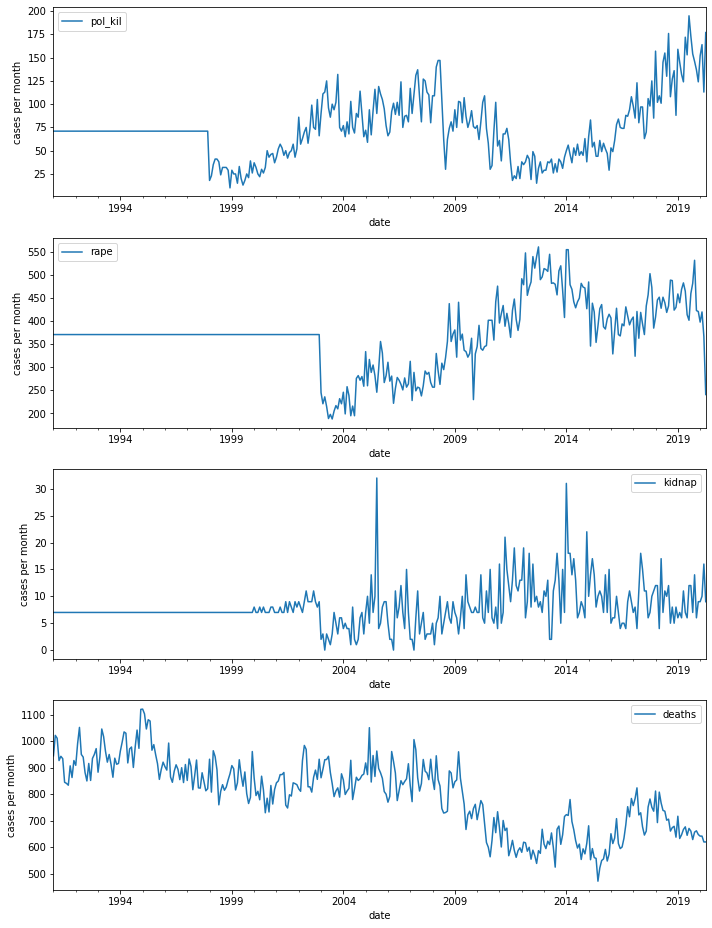

In [298]:
df_violent = pd.DataFrame(df_clean[['ano', 'mes']])

df_violent['date'] = df_violent['ano'].map(str) + '-' + df_violent['mes'].map(str)
df_violent['date'] =  pd.to_datetime(df_violent['date'], format="%Y-%m")


df_violent['rape'] = df_clean['estupro']
df_violent['pol_kil'] = df_clean['hom_por_interv_policial']
df_violent['kidnap'] = df_clean.sequestro + df_clean.sequestro_relampago
df_violent['deaths'] = df_clean.latrocinio + df_clean.hom_culposo + df_clean.hom_doloso + df_clean.hom_por_interv_policial
df_violent.describe()

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,13))
df_violent.plot(x='date', y='pol_kil', ax=ax1)
df_violent.plot(x='date', y='rape', ax=ax2)
df_violent.plot(x='date', y='kidnap', ax=ax3)
df_violent.plot(x='date', y='deaths', ax=ax4)
ax1.set_ylabel('cases per month')
ax2.set_ylabel('cases per month')
ax3.set_ylabel('cases per month')
ax4.set_ylabel('cases per month')
plt.tight_layout()
plt.show()

It is possible to get some information from the time series of these variables.

* Police Killings - As reported by BBC, the number of civilian deaths in police actions is increasing significantly. **It is the highest number since this data started to be recorded in 1991.**

* Rape - The official monthly cases of rape in the state more than doubled from 2003 until 2019. Is the number of actual rapes increasing? Or more victims started reporting the cases and pressing charges during the years? The results can be interpreted in many ways and the conclusions are totally different, so critical thinking is fundamental and additional data has to be raised to support any new theory. **With the available information it is not possible to state that cases of rape are reducing with time.**

* Kidnapping - The cases are also on an ascending trend, but we can see a spikes in the graph showing that the month to month variation is big when compared to the mean behaviour.

* Deaths - The number of dead people during criminal situations reduced significantly from 2007 to 2013. Then it oscillated and from 2016 it started rising back again. If we look at the time series for Rape, 2016 is also the year when the trend changed. 

Interested on that I did a quick search on the Internet about public safety in Rio de Janeiro in 2016, and remembered an important fact: **That was the year of the Olympic Games in the city.** Many publications such as [this one](https://www.reuters.com/article/us-brazil-olympics-one-year/a-year-after-olympics-brazils-army-called-to-quell-violence-in-rio-idUSKBN1AK27P) in Reuters discuss how badly the investments were done in safety measures, and that **they were just enough to hide the violence during the games.** Once the games ended, the resources were significantly reduced, and with that the violent crimes came back again.

But the deaths were reducing since 2007, so the investment for the Olympics is only part of the story. What is interesting is that **from 2007 until 2013 the death rates on violent crimes reduced with a reduction of police killings.** A more detailed investigation in the history of safety policies from 2007 until 2013 can help to develop new ideas and improve the fight against crime.

Now letting the month to month variation aside the long term trends per year can be better visualized.



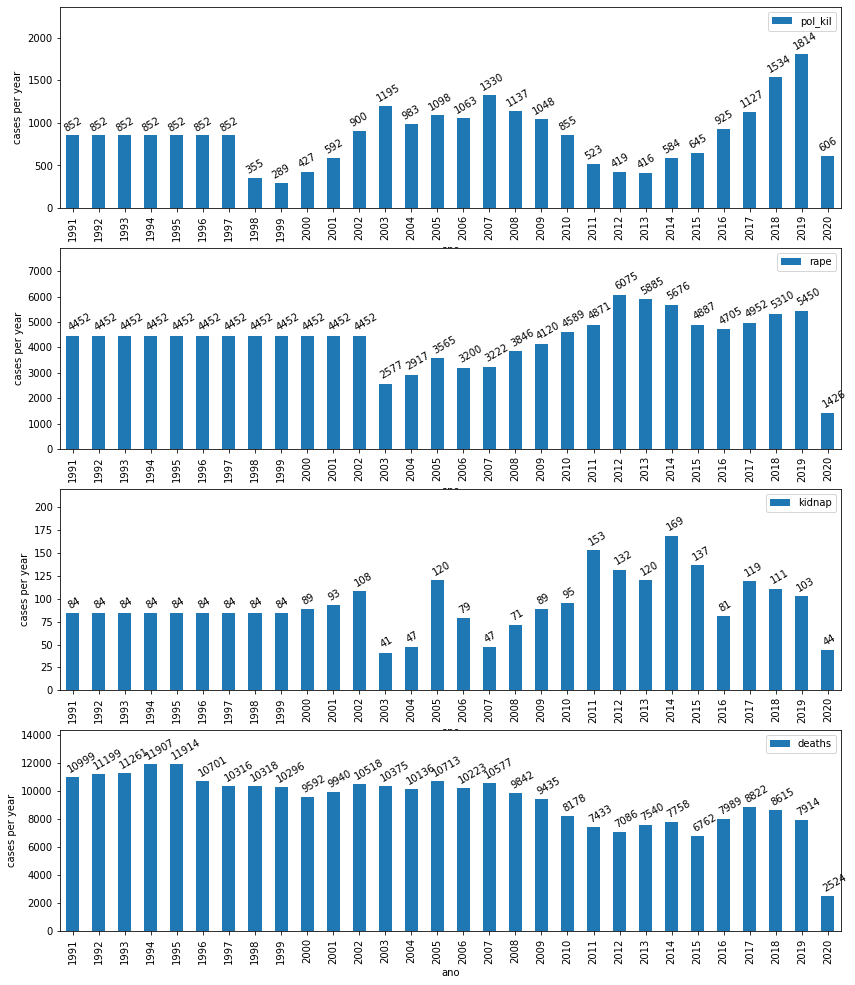

In [300]:
df_ano = df_violent.groupby('ano').sum()
df_ano['total'] = df_ano.rape + df_ano.kidnap + df_ano.deaths
figu, (ax5, ax6, ax7, ax8)= plt.subplots (4, 1, figsize=(14, 17))
df_ano.plot.bar(y='pol_kil', ax=ax5)
df_ano.plot.bar(y='rape', ax=ax6)
df_ano.plot.bar(y='kidnap', ax=ax7)
df_ano.plot.bar(y='deaths', ax=ax8)

for i, v in enumerate(df_ano.pol_kil):
  ax5.text(i-0.4, v+50, str(v), rotation=30, color='black')
ax5.margins(0.3, y=max(df_ano.pol_kil))

for i, v in enumerate(df_ano.rape):
  ax6.text(i-0.25, v+200, str(v), rotation=30, color='black')
ax6.margins(0.3, y=max(df_ano.rape))

for i, v in enumerate(df_ano.kidnap):
  ax7.text(i-0.25, v+5, str(v), rotation=30, color='black')
ax7.margins(0.3, y=max(df_ano.kidnap))

for i, v in enumerate(df_ano.deaths):
  ax8.text(i-0.25, v+300, str(v), rotation=30, color='black')
ax8.margins(0.2, y=max(df_ano.deaths))

ax5.set_ylabel('cases per year')
ax6.set_ylabel('cases per year')
ax7.set_ylabel('cases per year')
ax8.set_ylabel('cases per year')
plt.tight_layout
plt.show()

The numbers are shocking. Among victims of rape, kidnapping and murders there are more than 10000 people impacted directly by the violence in Rio de Janeiro every year. **Daily that represents more than 27 people going through events that will end their life or change it severely in a single state of Brazil.** That doesn't include robberies, injuries and the psychological impacts that this situation also brings along. I will not dive into comparisons of deaths per total population, there are many good studies showing that. But it is impossible not to feel deeply sad about this reality.

In the first chart we can also see the increase in people killed in police actions from 416 in 2013 to 1814 in 2019. It increased to 4.36 times in 6 years. **However the trends of violent crimes are not descendent within this timeframe.** The results in 2019 are pretty much the same ones achieved in 2013.

## Correlation among Data

Correlation is an important flag on the path to generate and validate some theories. If there is a strong correlation among data it should be investigated more deeply to understand if there is a cause-consequence relation as well. But in the absence of correlation, there are few chances that these two variables are indeed directly connected.

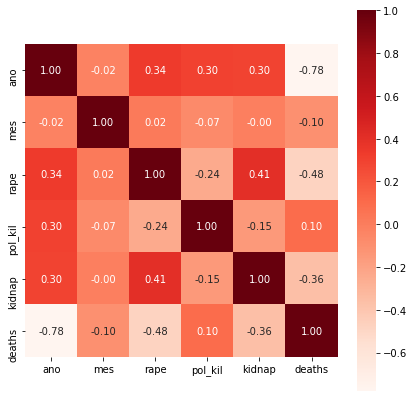

In [230]:
corr = df_violent.corr()
corr
fig3, ax9 = plt.subplots(1, 1, figsize=(7,7))
sns.heatmap(corr, cmap='Reds', fmt='.2f', square=True, linecolor='white', annot=True, ax=ax9);

The strongest correlation in the table is among deaths and years, which is a sign that the total deaths in criminal events are reducing with time. But this correlation is an analysis involving the entire dataset, from 1991 until 2019, so this has no strict relationship with the last couple years. **When we look at police killings, there are no signs of strong correlation with any of the changes in crime rates.** That means that even if we see more police killings in the next years that does not necessarily mean a progress towards violence reduction in the state.

## Conclusion

After a  quick analysis of the violence numbers in the state of Rio de Janeiro we can come up with a couple questions and conclusions:

* **Police killings in confrontation with suspects has increased by more than 4 times in 6 years.** It is not a random variation so it is probably consequence of different safety procedures or actions.
* The number of official rape cases is increasing, but **more data is needed before concluding that this is an increase in the actual violence.** Subnotification is known as an issue in this type of crime and the results can also mean that more victims are coming forward and reporting the cases.
* The kidnapping cases fluctuate a lot over the months and years, so it is not possible to attribute the recent reductions to any cause with the data available. **More information is needed in order to make sure that it is not a common cause variation.**
* The death of civilians in criminal situations has a reduction trend if we analyze the entire dataset since 1991. However there is **no sign of reduction trend since 2013, when the police killings started to increase.** There is also no strong correlation between the number of people killed by the police and the cases of rape, kidnapping and deaths in criminal situations.

* The best hypotesis is that both crime rates and police killings are dependent variables of other factors such as the quantity of police officers on the street, the number of confrontations with criminals and the quantity of major police actions in critical regions. However it is important to remember again that from 2007 until 2012 the death rates reduced consistently, with also a consistent drop of police killing events, so **there are better alternatives to this problem than the use of brute force.**

The public safety problem involves hundreds of variables and solutions involve huge efforts not only from public safety agencies but from the government as a whole. The purpose of this analysis is to extend the discussion from BBC's article with some additional data, and maybe raise new theories that can be further investigated in our path to a more equal and peaceful society. In a generation where a single person can shout personal opinions to thousands of people I really believe **we must look beneath the surface and rely on data to solve problems of our society.**